In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import lsst.sims.maf.db as db
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metricBundles as metricBundles

In [2]:
# Set up the database connection
opsdb = db.OpsimDatabase('astro_lsst_01_1027_sqlite.db')
outDir = 'output'
resultsDb = db.ResultsDb(outDir=outDir)

In [9]:
filters = ['g', 'r', 'i']
bundleList = []
metric = metrics.Coaddm5Metric()
slicer = slicers.HealpixSlicer(nside=128)
plotDicts = {'g': {'colorMin': 24.5, 'colorMax': 26.5, 'nTicks': 7, 'labelsize': 10, 'figsize': [11,8]},
             'r': {'colorMin': 24., 'colorMax': 26, 'nTicks': 7, 'labelsize': 10, 'figsize': [11,8]},
             'i': {'colorMin': 24., 'colorMax': 26, 'nTicks': 7, 'labelsize': 10, 'figsize': [11,8]}}
for fn in filters:
    sql = 'filter="%s"' % fn
    
    bundle = metricBundles.MetricBundle(metric, slicer, sql, plotDict=plotDicts[fn])
    bundleList.append(bundle)

Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes


In [10]:
bundleDict = metricBundles.makeBundlesDictFromList(bundleList)
bgroup = metricBundles.MetricBundleGroup(bundleDict, opsdb, outDir=outDir, resultsDb=resultsDb)
bgroup.runAll()

Querying database with constraint filter="i"
Found 541598 visits
Running:  ['opsim_CoaddM5_i_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database with constraint filter="r"
Found 536246 visits
Running:  ['opsim_CoaddM5_r_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database with constraint filter="g"
Found 246408 visits
Running:  ['opsim_CoaddM5_g_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


Plotting figures with "filter="i"" constraint now.
Plotting complete.
Plotting figures with "filter="r"" constraint now.
Plotting complete.
Plotting figures with "filter="g"" constraint now.
Plotting complete.


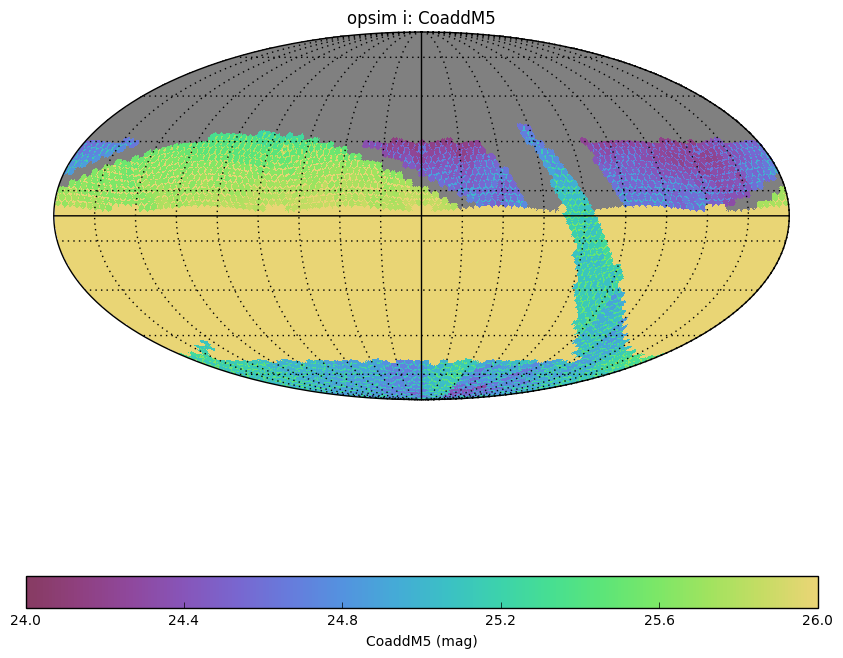

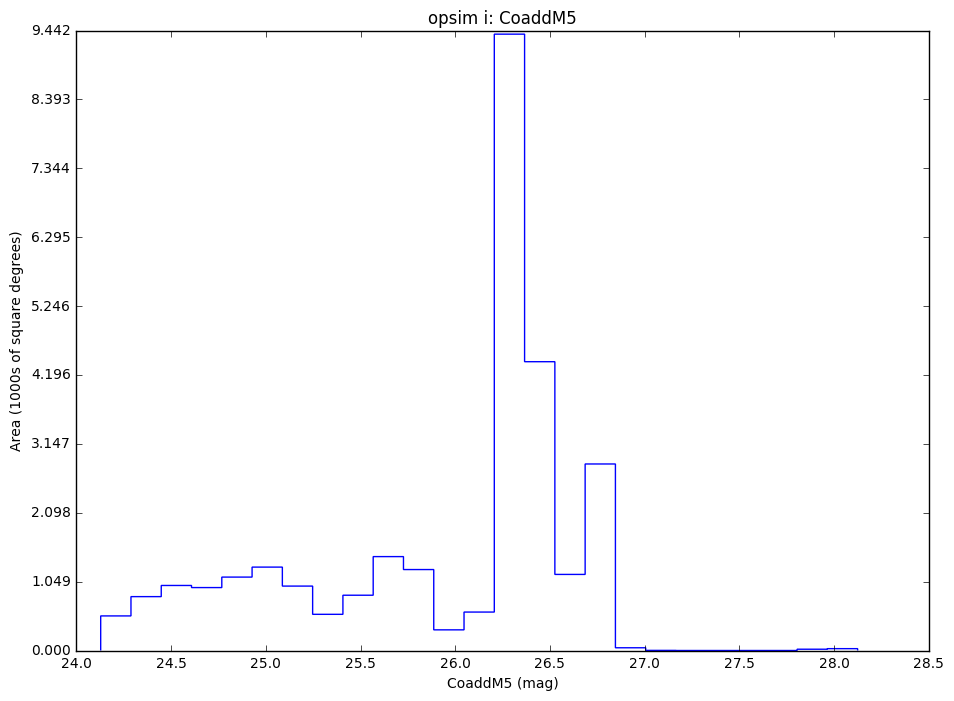

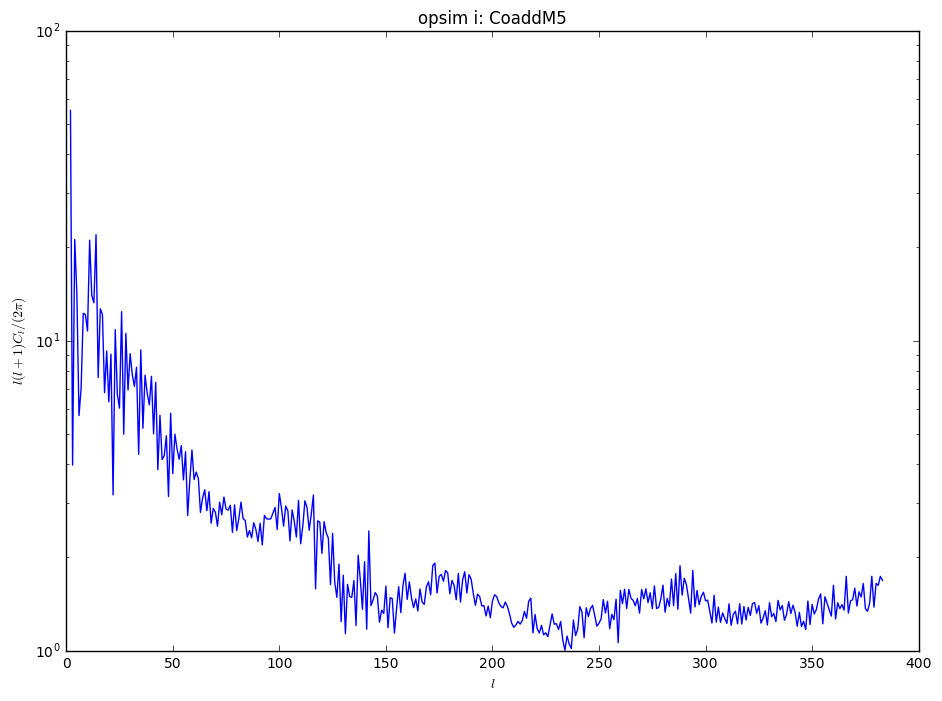

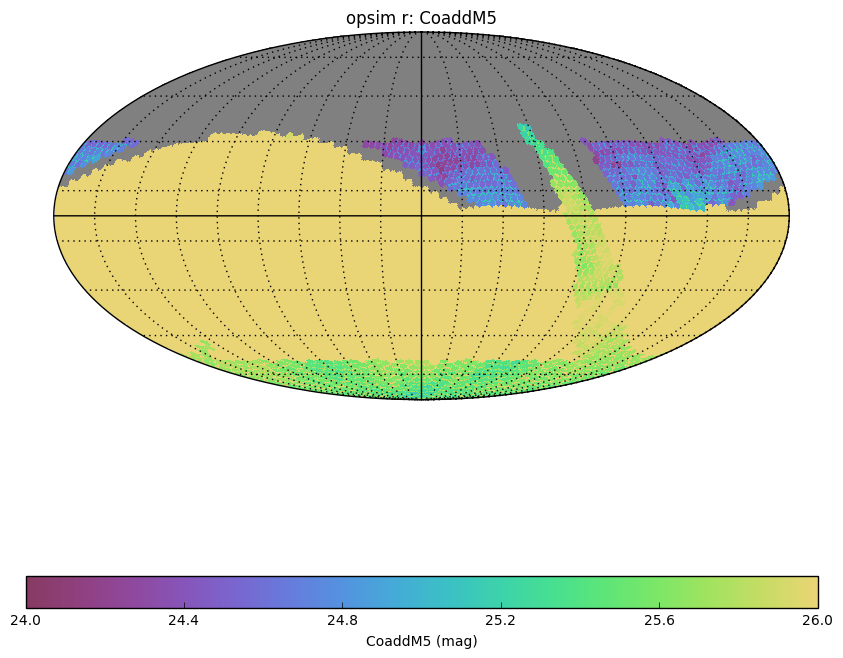

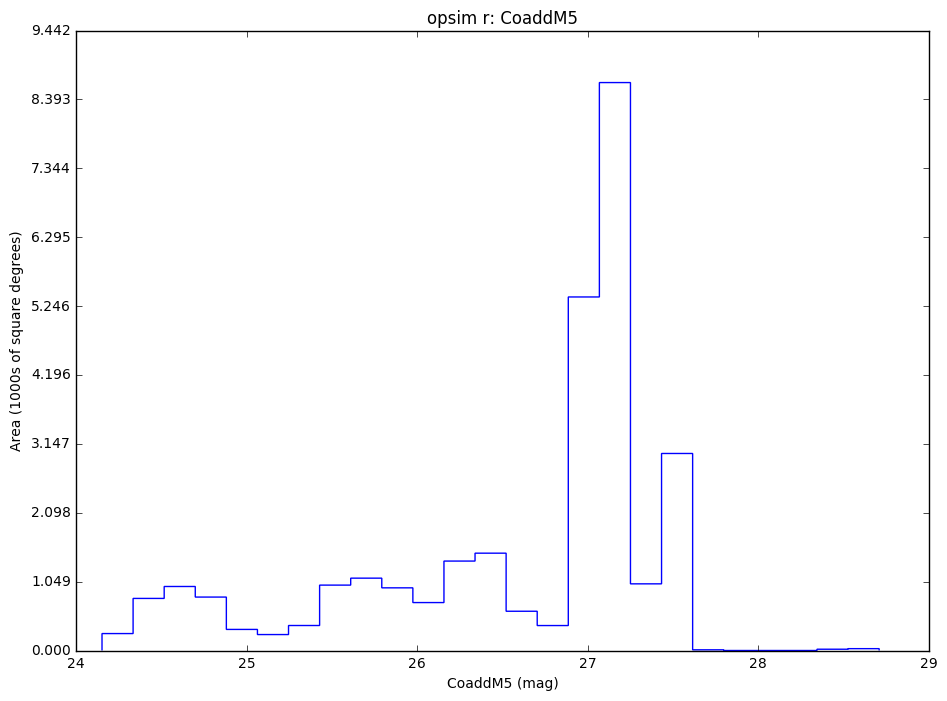

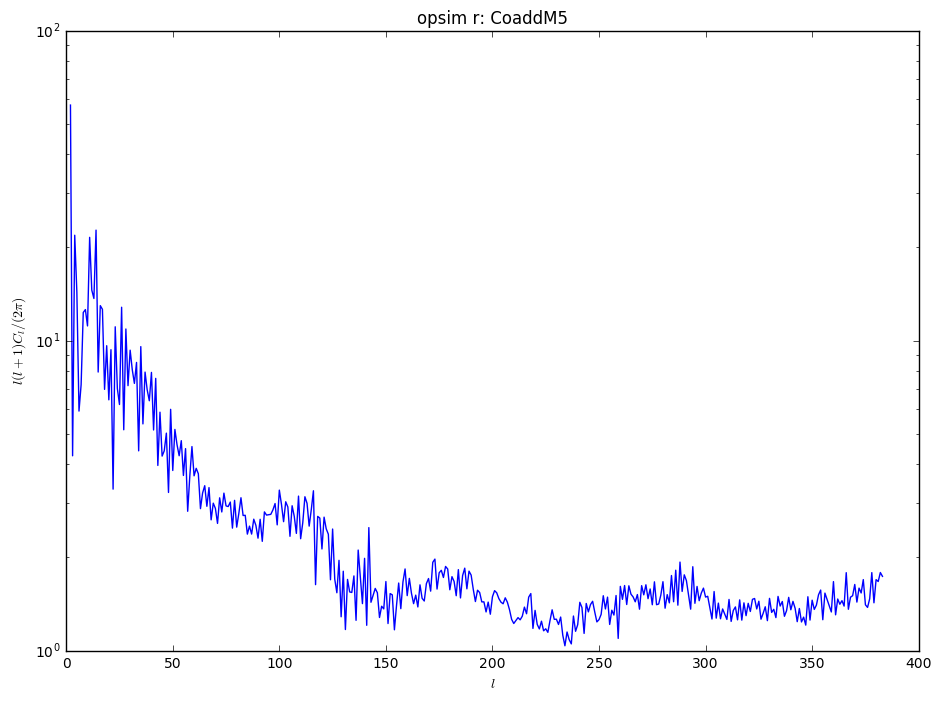

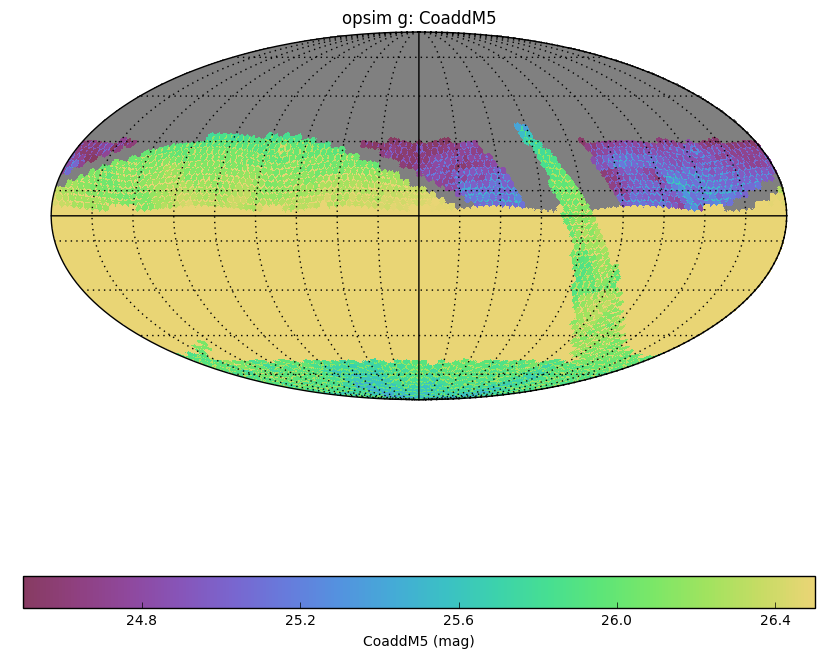

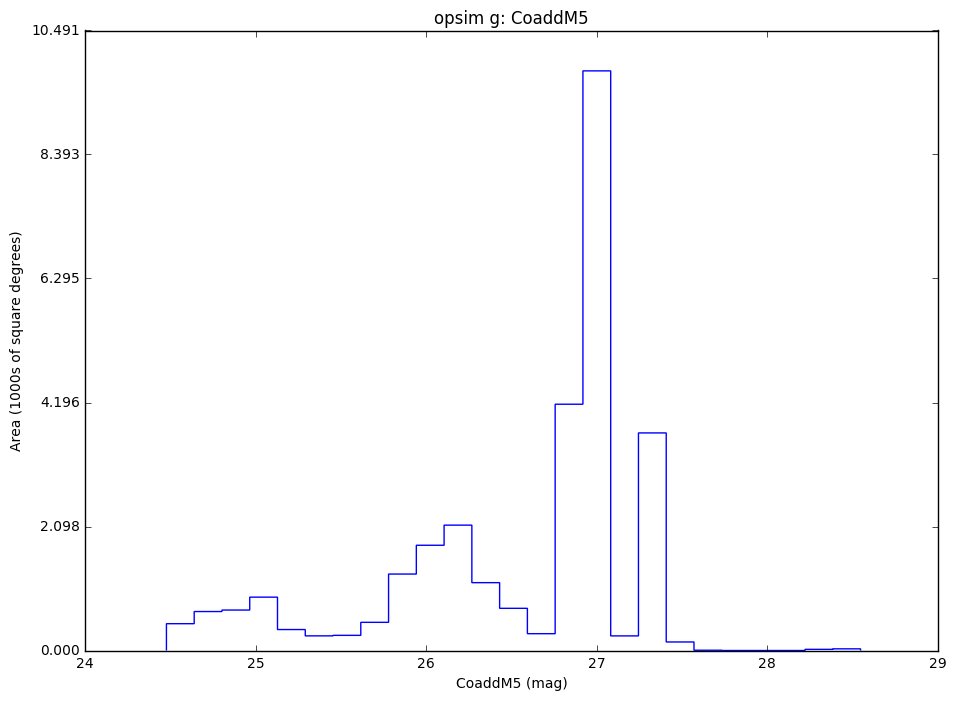

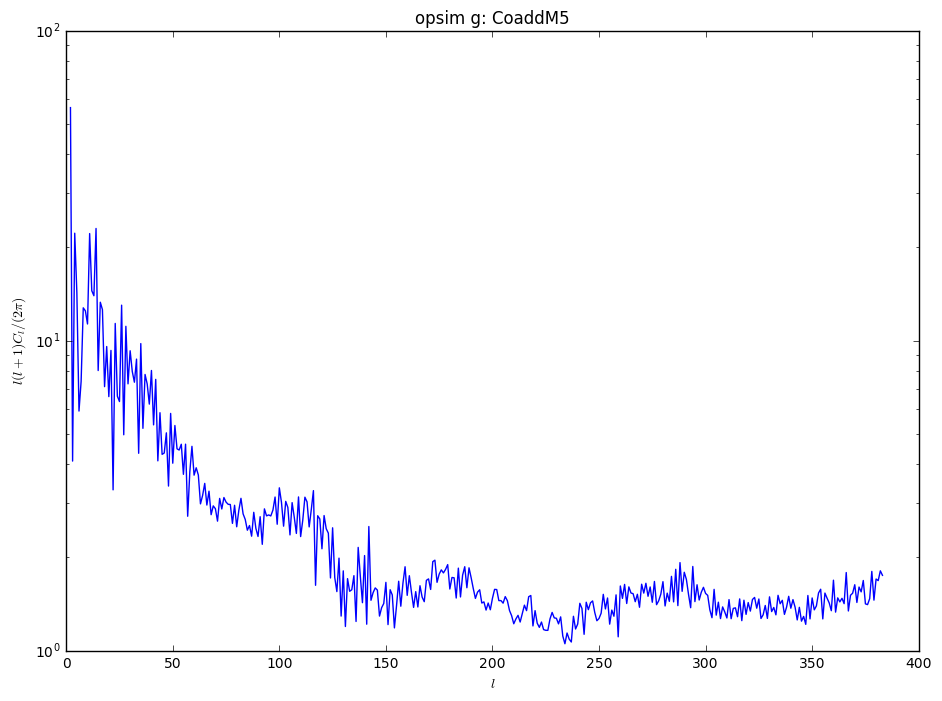

In [11]:
bgroup.plotAll(closefigs=False)